# Binary Search Algorithm

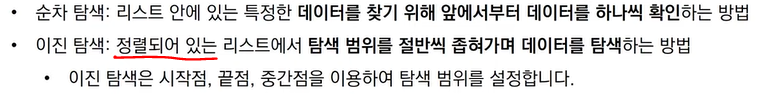
* 퀵정렬과 달리 이진탐색은 탐색하는 알고리즘이다(퀵정렬은 pivot값을 정해서 정렬하는 것)
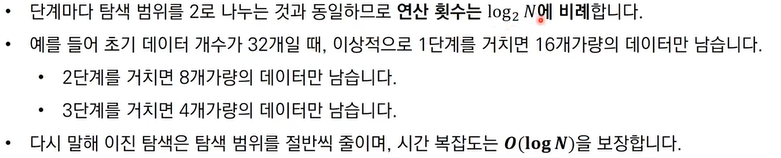

In [33]:
''' python '''

def binary_search(array, target, start, end):
    if start > end:
        return None                # <중요> 이러한 경우 찾는 데이터가 없는 경우임
    
    #pivot = (int)(end/2)
    pivot = (start+end)//2
    
    if target == array[pivot]:
        return pivot
        
    elif target < array[pivot]:
        return binary_search(array, target, 0, pivot-1)   
    
    elif target > array[pivot]:
        return binary_search(array, target, pivot+1, end)
        

n = 10
target = 7
array = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

result = binary_search(array, target, 0, n-1)

if result == None:
    print("원소가 없음")
else:
    print("target", target, "located in array[", result, "]")

target 7 located in array[ 3 ]


In [34]:
''' python '''

def binary_search(array, target, start, end):
    while start <= end:       # <중요>데이터가 존재할 때까지만 수행
        pivot = (start+end)//2
    
        if target == array[pivot]:
            return pivot

        elif target < array[pivot]:
            end = pivot-1

        elif target > array[pivot]:
            start = pivot+1
    return None

n = 10
target = 7
array = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

result = binary_search(array, target, 0, n-1)

if result == None:
    print("원소가 없음")
else:
    print("target", target, "located in array[", result, "]")

target 7 located in array[ 3 ]


---

## 파이썬 Binary Search 라이브러리
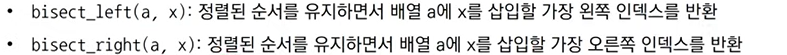
- 코딩테스트 시 사용 가능하며 유용함

In [37]:
from bisect import bisect_left, bisect_right

array = [1,2,4,4,8]
target = 4

print("target", target, "located in array[", bisect_left(array, target), "] (starting left)")
print("target", target, "located in array[", bisect_right(array, target), "] (starting right)")

target 4 located in array[ 2 ] (starting left)
target 4 located in array[ 4 ] (starting right)


## 값이 특정 범위에 속하는 데이터 개수 구하기
* input array = [1,2,3,3,3,3,4,4,8,9]
* 값이 4인 데이터 개수 출력
* 값이 [-1 ~ 3] 범위에 있는 데이터 개수 출력 (인덱스 -1이상, 3이하)

In [39]:
from bisect import bisect_left, bisect_right

def count_by_range(a, left_value, right_value):
    right_idx = bisect_right(a, right_value)
    left_idx = bisect_left(a, left_value)
    
    result = right_idx - left_idx     # 두 인덱스 사이 데이터 개수 = 두 인덱스의 차
    return result



array = [1,2,3,3,3,3,4,4,8,9]

# 값이 4인 데이터 개수 출력
print(count_by_range(array, 4, 4))

# 값이 [-1 ~ 3] 범위에 있는 데이터 개수 출력 (인덱스 -1이상, 3이하)
print(count_by_range(array, -1, 3))

2
6


---

## Parametric Search (파라메트릭 서치)
* Binary Search를 사용해야하는 문제 출제 시 파라메트릭 서치를 활용한 문제로 출제됨
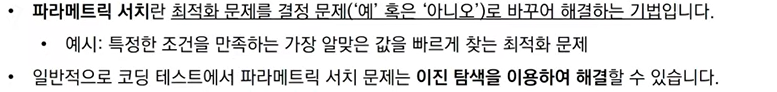
* 참고) 최적화 문제란
    - 어떤 함수의 값을 가능한 낮추거나, 최대한 높이거나 하는 등의 문제인데
    - 이러한 문제는 바로 해결하기 어려운 경우, 여러 번의 결정문제를 이용해 바꾸어서 문제를 해결하는 것이 "파라메트릭 서치"
---

## 문제1. 떡볶이 떡 만들기 문제
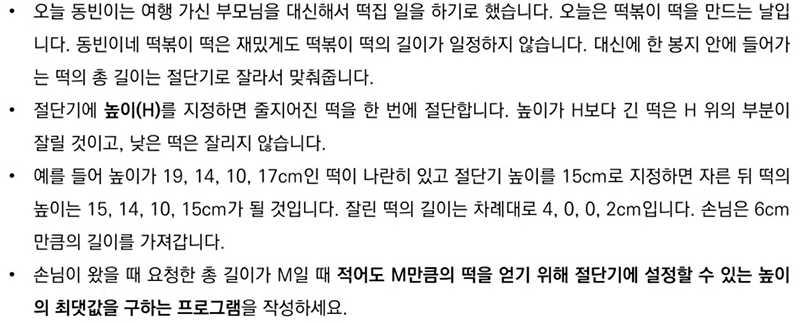

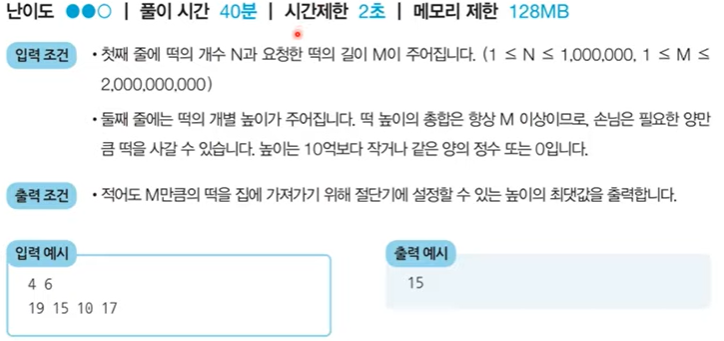

* 문제 해결 아이디어
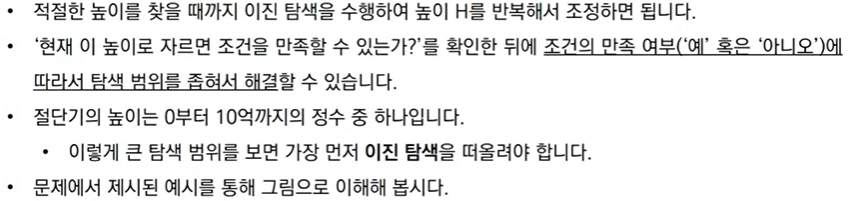